# Notebook Cartão de Crédito

## 02.04 Obtendo a base de dados

In [1]:
import pandas as pd

dataframe = pd.read_csv('data/CC_GENERAL.csv')
dataframe.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [2]:
dataframe.shape

(8950, 18)

In [3]:
dataframe.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

## 02.05 Organizando os dados

In [4]:
dataframe.drop(columns=['CUST_ID', 'TENURE'], inplace=True)

In [5]:
dataframe.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


In [6]:
dataframe.shape

(8950, 16)

In [7]:
missing = dataframe.isna().sum()
print(missing)

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64


In [8]:
dataframe['MINIMUM_PAYMENTS'].describe()

count     8637.000000
mean       864.206542
std       2372.446607
min          0.019163
25%        169.123707
50%        312.343947
75%        825.485459
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

Adotaremos como estratégia a substituição desse valor pela mediana dos valores deste atributo de total de pagamentos minimos realizados. Não é um valor exato, e sim um aproximado por assim dizer.

In [9]:
dataframe.fillna(dataframe.median(), inplace=True)

missing = dataframe.isna().sum()
print(missing)

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64


O próximo passo é normalizar nossos dados. Em alguns atributos relacionados à frequência, teremos um limite que varia de 0 a 1, sendo que 0 é 0% de frequência e 1, por sua vez, significa 100%. Para o atributo de balanço, não teremos a mesma organização de mínimo ou máximo, e isso pode fazer com que o algorítimo gere dados pouco satisfatórios para nós.

Para realizar a normalização dos dados todos entre zero e um, utilizaremos o biblioteca *Scikit learn*, importando o Normalizer do pacote ´´´sklearn.preprocessing´´´.

In [10]:
from sklearn.preprocessing import Normalizer

values = Normalizer().fit_transform(dataframe.values)
print(values)

[[3.93555441e-02 7.87271593e-04 9.17958473e-02 ... 1.94178127e-01
  1.34239194e-01 0.00000000e+00]
 [2.93875903e-01 8.34231560e-05 0.00000000e+00 ... 3.76516684e-01
  9.84037959e-02 2.03923046e-05]
 [3.10798149e-01 1.24560965e-04 9.63068011e-02 ... 7.74852335e-02
  7.81351982e-02 0.00000000e+00]
 ...
 [2.27733092e-02 8.11060955e-04 1.40540698e-01 ... 7.90986945e-02
  8.02156174e-02 2.43318384e-04]
 [2.65257948e-02 1.64255731e-03 0.00000000e+00 ... 1.03579625e-01
  1.09898221e-01 4.92767391e-04]
 [1.86406219e-01 3.33426837e-04 5.46778061e-01 ... 3.15915455e-02
  4.41568390e-02 0.00000000e+00]]


## 02.06 Executando o clustering

In [11]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)

y_pred = kmeans.fit_predict(values)

## 03.04 Critérios de validação

Métricas externas: Precisamos ter os labels 
Métricas internas: Independente dos labels

Dentro das métricas internas:

Critério de compactação: que nos relata quão próximos estão os pontos em um mesmo cluster. 

Critério de separação: que indica quão bem separados estão os pontos em clusters diferentes. 


## 03.04 Matemática de Silhouette

**_Coeficiente de Silhouette_**

$\displaystyle s = \frac{\beta - \alpha}{max(\alpha,\ \beta)} $

em que $\alpha$ é a **distância média** entre o ponto de interesse e todos os outros pontos do **mesmo cluster**. Vamos verificar a compactação dos elementos.

$\beta$ é a **distância média** entre o ponto de interesse e todos os outros pontos do **cluster mais próximo**.

## 03.05 Calculando o Silhouette

In [12]:
from sklearn import metrics
labels = kmeans.labels_
silhouette = metrics.silhouette_score(values, labels, metric='euclidean')
print(silhouette)

0.3644898056514388


## 04.04 Matemática do Davies-Bouldin

**_Índice Davies-Bouldin_**

$\displaystyle DB = \frac{1}{k} \sum^{k}_{i=1} max \ R_{ij} \ (i \neq j)$

Em que $R_{ij}$ é dado por

$\displaystyle R_{ij} = \frac{s_i + s_j}{d_{ij}}$

sendo $s$ a similaridade dentro do cluster, isto é, **compactação**.  O $d$ reflete a similaridade entre clusters, a **separação**. Assim temos os dois critérios importantes para uma boa validação



## 04.05 Calculando o Davies-Bouldin

In [13]:
dbs = metrics.davies_bouldin_score(values, labels)
print(dbs)

1.0759066485438376


## 05.04 Matemática do Calinski (Parte 1)

Índice de **Calinski-Harabasz** leva em consideração a dispersão dos pontos dentro de um cluster, tanto nos pontos dentro de um cluster específico, como entre clusters diferentes, considerando a compactação e separação também.

$\displaystyle s = \frac{tr(B_k)}{tr(W_k)} \times \frac{n_E - k}{k - 1}$ 

$n_E$ é o número de elementos dentro do cluster.

$k$ é o número de clusters.

$B_k$ é a dispersão dos elementos entre clusters, sendo que a letra "B" significa between.

$W_k$ é a dispersão de elementos dentro do cluster. $W_k$ é calculado pela seguinte expressão:

$\displaystyle W_k = \sum_{q=1}^{k} \sum_{x \in C_q} (x - c_q) (x - c_q)^T$

em que $x$ é o valor do atributo e $c_q$ é o valor do centróide deste atributo para o cluster $q$.

$\sum_{x \in C_q} (x - c_q) (x - c_q)^T$ é uma matriz de **variância-covariância**(?)

**Esta explicação do curso está bem ruim. Atualizar quando possível**

## 05.05 Matemática do Calinski (Parte 2)

cálculo da matriz de variância-covariância para cada cluster

soma das matrizes de variância-covariância

cálculo do traço da matriz resultante

## 05.06 Matemática do Calinski (Parte 3)

$\displaystyle B_k = \sum_{q=1}^{k} n_q (c_q - c_E) (c_q - c_E)^T$

$k$ é o número de clusters.

$n_q$ = número de elementos no cluster

$c_q$ = centróide do cluster

$c_E$ = centróide dos elementos 

O índice de Calinski-Harabasz aqui é $s = 47,64$



## 05.07 Calculando o Calinski

In [14]:
calinski = metrics.calinski_harabasz_score(values, labels)
print(calinski)

3431.78924295057


## 06.04 A validação relativa

In [15]:
def clustering_algorithm(n_clusters, dataset):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(dataset)

    s = metrics.silhouette_score(dataset, labels, metric='euclidean')
    dbs = metrics.davies_bouldin_score(dataset, labels)
    calinski = metrics.calinski_harabasz_score(dataset, labels)

    return s, dbs, calinski
    

In [16]:
s1, dbs1, calinski1 = clustering_algorithm(3, values)
print(s1, dbs1, calinski1)

0.3272203126696238 1.3096073640088433 3526.440519908274


In [17]:
s2, dbs2, calinski2 = clustering_algorithm(5, values)
print(s2, dbs2, calinski2)

0.3646411311893523 1.0748942039555325 3431.7606399266433


In [18]:
s3, dbs3, calinski3 = clustering_algorithm(10, values)
print(s3, dbs3, calinski3)

0.3501079786783068 1.1206480925904516 3018.967359227005


In [19]:
s4, dbs4, calinski4 = clustering_algorithm(20, values)
print(s4, dbs4, calinski4)

0.2951428364300953 1.2252718568424743 2403.989542870379


## 06.05 A estrutura dos clusters

In [20]:
dataframe.count()

BALANCE                             8950
BALANCE_FREQUENCY                   8950
PURCHASES                           8950
ONEOFF_PURCHASES                    8950
INSTALLMENTS_PURCHASES              8950
CASH_ADVANCE                        8950
PURCHASES_FREQUENCY                 8950
ONEOFF_PURCHASES_FREQUENCY          8950
PURCHASES_INSTALLMENTS_FREQUENCY    8950
CASH_ADVANCE_FREQUENCY              8950
CASH_ADVANCE_TRX                    8950
PURCHASES_TRX                       8950
CREDIT_LIMIT                        8950
PAYMENTS                            8950
MINIMUM_PAYMENTS                    8950
PRC_FULL_PAYMENT                    8950
dtype: int64

In [21]:
import numpy as np

random_data = np.random.rand(8950, 16)
s, dbs, calinski = clustering_algorithm(5, random_data)
print(s, dbs, calinski)
print(s2, dbs2, calinski2)

0.039651609151582376 3.57230966258413 304.0419995157944
0.3646411311893523 1.0748942039555325 3431.7606399266433


## 06.06 A estabilidade dos clusters

In [22]:
set1, set2, set3 = np.array_split(values, 3)

s1, dbs1, calinski1 = clustering_algorithm(5, set1)
s2, dbs2, calinski2 = clustering_algorithm(5, set2)
s3, dbs3, calinski3 = clustering_algorithm(5, set3)

print(s1, dbs1, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)

0.36924842589129836 1.0531977672086477 1204.034367351662
0.3539831746159207 1.1396268152633486 1194.9384641787258
0.3671295822367336 1.0986515442188245 1167.5095540290715


# 07.04 Gerando gráficos

<function matplotlib.pyplot.show(*args, **kw)>

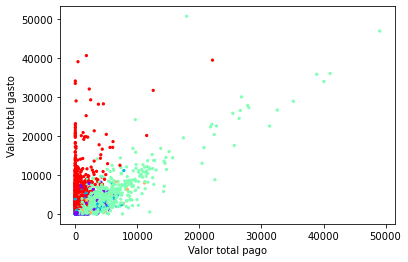

In [23]:
import matplotlib.pyplot as plt
plt.scatter(dataframe['PURCHASES'], dataframe['PAYMENTS'], c=labels, s=5, cmap='rainbow')
plt.xlabel("Valor total pago")
plt.ylabel("Valor total gasto")
plt.show

## 07.05 Interpretação visual

In [24]:
import seaborn as sns

dataframe["cluster"] = labels
# sns.pairplot(dataframe[:], hue="cluster")

Note que este tipo de visualização não nos ajuda muito. Será que existem outras maneiras mais eficientes para lidar com clusters?

## 08.04 Descrevendo os atributos

In [25]:
dataframe.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,4
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,1


In [26]:
dataframe.groupby("cluster").describe()

BALANCE                                                    \
          count         mean          std        min          25%   
cluster                                                             
0        3278.0   443.686936   846.638963   0.000000    23.315538   
1        2650.0  3036.248283  2479.309071   6.824905  1254.527753   
2        1538.0  1143.712630  1664.669654   0.000000   212.513230   
3         412.0  1987.146873  1852.215743  70.794108  1020.146724   
4        1072.0  1794.637544  1983.094646   0.000000   506.925348   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0          82.853026   409.431352   9630.367575            3278.0  0.774445   
1        2172.596565  4223.858877  18495.558550            2650.0  0.963556   
2         555.745265  1371.943854  19043.138560            1538.0  0.928255   
3        1338.918346  2133.415063  11670.179850             412.0  0.989512   
4        1087.920500  2316.353276  14581.459140            1072.0  0.862113   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
cluster  ...                                                             
0        ...       248.665527   4483.503862           3278.0  0.246956   
1        ...      1330.332500   8345.641905           2650.0  0.001798   
2        ...       524.765832  18621.013310           1538.0  0.278149   
3        ...      7086.774783  76406.207520            412.0  0.019271   
4        ...       886.834603  21235.065300           1072.0  0.117280   

                                                      
              std  min  25%       50%       75%  max  
cluster                                               
0        0.346801  0.0  0.0  0.000000  0.444444  1.0  
1        0.023256  0.0  0.0  0.000000  0.000000  0.6  
2        0.366934  0.0  0.0  0.083333  0.545455  1.0  
3        0.090795  0.0  0.0  0.000000  0.000000  1.0  
4        0.186888  0.0  0.0  0.083333  0.142857  1.0  

[5 rows x 128 columns]

## 08.05 Analisando os valores

In [27]:
centroids = kmeans.cluster_centers_
print(centroids)

[[6.89799575e-02 2.30763006e-04 1.21587120e-01 4.79794677e-02
  7.37079733e-02 2.40200669e-02 1.73016299e-04 3.36944404e-05
  1.40456777e-04 7.83464589e-06 1.22859223e-04 2.86637386e-03
  9.43639117e-01 1.53810130e-01 5.68564456e-02 7.61967577e-05]
 [5.03921255e-01 2.72113150e-04 6.16530767e-02 3.62423439e-02
  2.54324377e-02 2.52987077e-01 6.71065240e-05 2.56761606e-05
  4.48636474e-05 5.75015632e-05 1.15732293e-03 1.32766819e-03
  7.19478325e-01 1.66049326e-01 1.79001627e-01 5.79660872e-07]
 [1.59893172e-01 2.45101382e-04 4.38385714e-01 2.57205740e-01
  1.81351596e-01 2.60404572e-02 2.04213900e-04 8.90367629e-05
  1.50434389e-04 9.40165310e-06 1.70436759e-04 6.17221746e-03
  6.03815441e-01 4.02876087e-01 8.52134751e-02 7.19112993e-05]
 [3.33483624e-01 2.68969713e-04 1.59146477e-01 3.61931219e-02
  1.23336164e-01 5.80731211e-02 1.67333390e-04 2.64804728e-05
  1.47698430e-04 1.92281888e-05 4.25862512e-04 3.87053484e-03
  3.77114118e-01 2.52735252e-01 6.78741705e-01 4.21940580e-06]
 [2.

## 08.06 Selecionando os atributos

In [28]:
max = len(centroids[0])

for i in range(max):
    print(dataframe.columns.values[i],"\n {:.4f}".format( centroids[:, i].var()))

BALANCE 
 0.0224
BALANCE_FREQUENCY 
 0.0000
PURCHASES 
 0.0197
ONEOFF_PURCHASES 
 0.0077
INSTALLMENTS_PURCHASES 
 0.0036
CASH_ADVANCE 
 0.0226
PURCHASES_FREQUENCY 
 0.0000
ONEOFF_PURCHASES_FREQUENCY 
 0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 
 0.0000
CASH_ADVANCE_FREQUENCY 
 0.0000
CASH_ADVANCE_TRX 
 0.0000
PURCHASES_TRX 
 0.0000
CREDIT_LIMIT 
 0.0360
PAYMENTS 
 0.0279
MINIMUM_PAYMENTS 
 0.0540
PRC_FULL_PAYMENT 
 0.0000


In [29]:
centroids[:, i].var()

1.0476202888942274e-09

In [30]:
dataframe

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,4
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,0
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,312.343947,0.000000,0
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,0
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,0


In [31]:
len(dataframe.columns.values[:-1])

16

In [32]:
len([centroids[:, i].var() for i in range(len(centroids[0]))])

16

construindo um dataframe com duas colunas (variáveis, variância)

In [33]:
teste = pd.DataFrame(
    list(zip(dataframe.columns.values[:-1], [centroids[:, i].var() for i in range(len(centroids[0]))])),
    columns=['variable', 'variance']
)

Ordenando o df com base nos valores de variância

In [34]:
teste.sort_values(['variance'], ascending=False, inplace=True)
teste

,variable,variance
14,MINIMUM_PAYMENTS,5.404588e-02
12,CREDIT_LIMIT,3.596542e-02
13,PAYMENTS,2.792970e-02
5,CASH_ADVANCE,2.259730e-02
0,BALANCE,2.240223e-02
2,PURCHASES,1.965601e-02
3,ONEOFF_PURCHASES,7.667851e-03
4,INSTALLMENTS_PURCHASES,3.579797e-03
11,PURCHASES_TRX,3.427351e-06
10,CASH_ADVANCE_TRX,3.317448e-07


Removendo a variável "MINIMUM_PAYMENTS"

In [35]:
teste = teste.loc[teste['variable'] != 'MINIMUM_PAYMENTS']

Selecionando as 5 variáveis com maiores variância

In [36]:
teste.iloc[:5]

,variable,variance
12,CREDIT_LIMIT,0.035965
13,PAYMENTS,0.027930
5,CASH_ADVANCE,0.022597
0,BALANCE,0.022402
2,PURCHASES,0.019656


## 08.07 Filtrando os valores

In [37]:
dataframe.groupby("cluster")["BALANCE"].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,3278.0,443.686936,846.638963,0.000000,23.315538,82.853026,409.431352,9630.367575
1,2650.0,3036.248283,2479.309071,6.824905,1254.527753,2172.596565,4223.858877,18495.558550
2,1538.0,1143.712630,1664.669654,0.000000,212.513230,555.745265,1371.943854,19043.138560
3,412.0,1987.146873,1852.215743,70.794108,1020.146724,1338.918346,2133.415063,11670.179850
4,1072.0,1794.637544,1983.094646,0.000000,506.925348,1087.920500,2316.353276,14581.459140


In [46]:
description = dataframe.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
print(description)

             BALANCE    PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS  \
cluster                                                                      
0         443.686936   629.474701    140.638177   5131.847702   814.470560   
1        3036.248283   385.001970   1636.031421   4495.207547   968.264817   
2        1143.712630  3274.692952    186.045097   4103.875261  3046.004076   
3        1987.146873   858.326286    420.107194   2226.699029  1338.974045   
4        1794.637544   470.990466   3269.757206   3974.040310  4701.016454   

         n_clients  
cluster             
0             3278  
1             2650  
2             1538  
3              412  
4             1072  


<ipython-input-46-09694d8613d0>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  description = dataframe.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]


Uma forma automatizada de fazer a selecao seria:

In [41]:
selecao = teste["variable"].iloc[:5]
selecao

12    CREDIT_LIMIT
13        PAYMENTS
5     CASH_ADVANCE
0          BALANCE
2        PURCHASES
Name: variable, dtype: object

In [43]:
description = dataframe.groupby("cluster")[selecao]
description.mean()

,CREDIT_LIMIT,PAYMENTS,CASH_ADVANCE,BALANCE,PURCHASES
cluster,,,,,
0,5131.847702,814.470560,140.638177,443.686936,629.474701
1,4495.207547,968.264817,1636.031421,3036.248283,385.001970
2,4103.875261,3046.004076,186.045097,1143.712630,3274.692952
3,2226.699029,1338.974045,420.107194,1987.146873,858.326286
4,3974.040310,4701.016454,3269.757206,1794.637544,470.990466
